# Loan Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load Dataset

In [7]:
data=pd.read_csv(r'C:\Users\Lenovo\Downloads\dataset.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### EDA

In [8]:
data.drop(['Loan_ID'],axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [9]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

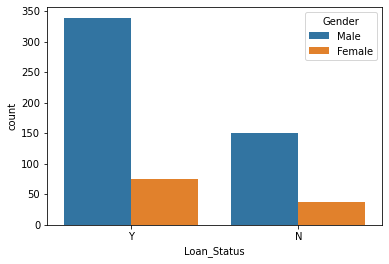

In [11]:
import seaborn as sns
sns.countplot(data['Loan_Status'],hue=data['Gender'])

Men are having better chance of getting loan than Female

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

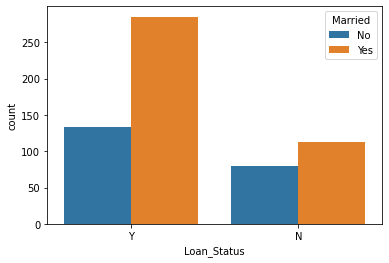

In [13]:
sns.countplot(data['Loan_Status'],hue=data['Married'])

The chance of getting loan is higher in Married People than Unmarried

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

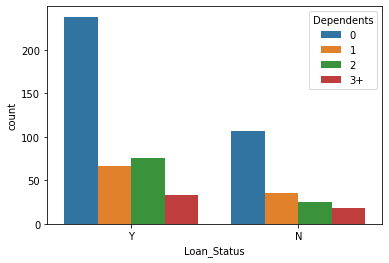

In [14]:
sns.countplot(data['Loan_Status'],hue=data['Dependents'])

As Dependent Count decreases chancs of getting loan increases

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

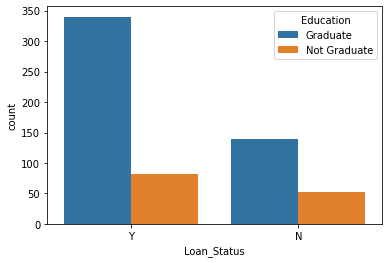

In [18]:
sns.countplot(data['Loan_Status'],hue=data['Education'])

Person who is educated will have more chance of getting loan than the uneduacted ones

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

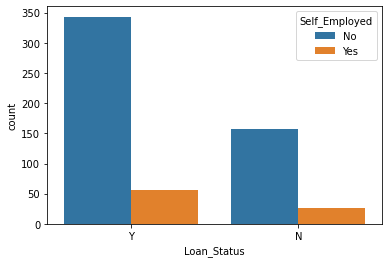

In [20]:
sns.countplot(data['Loan_Status'],hue=data['Self_Employed'])

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

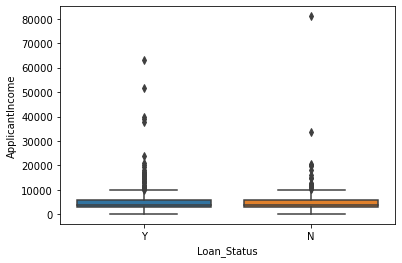

In [21]:
sns.boxplot(x='Loan_Status',y='ApplicantIncome',data=data)

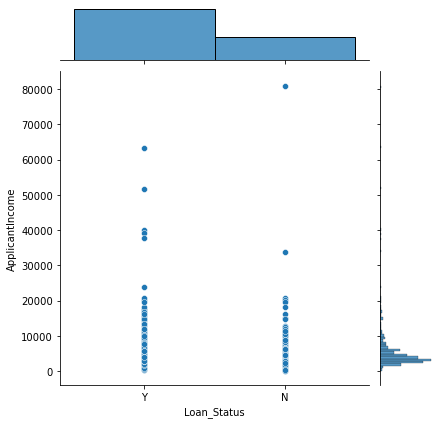

In [22]:
sns.jointplot(x='Loan_Status',y='ApplicantIncome',data=data)

If a person is having more income then he has some chance of getting loan but we are not so confident as these may be outliers

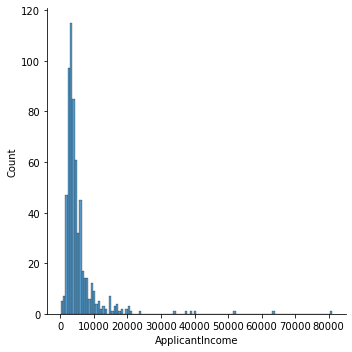

In [23]:
sns.displot(data['ApplicantIncome'])

Mostly applicant's income is between 0K-15K

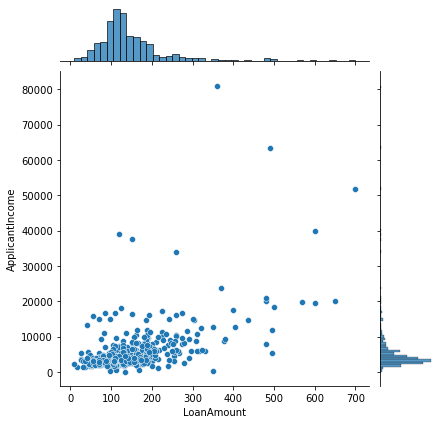

In [24]:
sns.jointplot(x='LoanAmount',y='ApplicantIncome',data=data)

<AxesSubplot:>

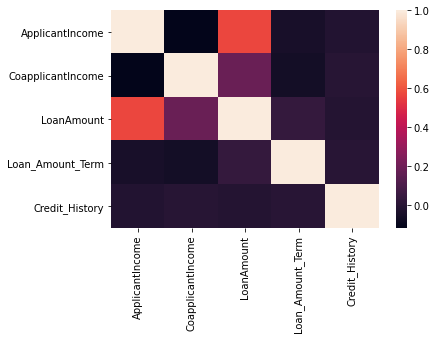

In [26]:
corr=data.corr()
sns.heatmap(corr)

In [27]:
data.drop(['LoanAmount'],axis=1,inplace=True)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

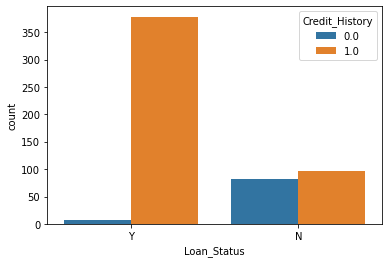

In [28]:
sns.countplot(data['Loan_Status'],hue=data['Credit_History'])

#### Handling Missing Values 

In [29]:
loan_credit_1Y=data['Loan_Status']=='Y'
loan_credit_1Y=list(loan_credit_1Y)
data.loc[loan_credit_1Y,'Credit_History']=data.loc[loan_credit_1Y,'Credit_History'].fillna(1.0)
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
Loan_Amount_Term     14
Credit_History       13
Property_Area         0
Loan_Status           0
dtype: int64

In [30]:
loan_credit_0N=data['Loan_Status']=='N'
loan_credit_0N=list(loan_credit_0N)
data.loc[loan_credit_0N,'Credit_History']=data.loc[loan_credit_0N,'Credit_History'].fillna(0.0)
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [31]:
data.dropna()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,360.0,1.0,Urban,Y


In [32]:
data.dropna(inplace=True,axis=0)

### Data Encoding

In [33]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(data['Gender'])

LabelEncoder()

In [34]:
le.classes_

array(['Female', 'Male'], dtype=object)

In [35]:
data['Gender']=le.transform(data['Gender'])
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,No,0,Graduate,No,5849,0.0,360.0,1.0,Urban,Y
1,1,Yes,1,Graduate,No,4583,1508.0,360.0,1.0,Rural,N
2,1,Yes,0,Graduate,Yes,3000,0.0,360.0,1.0,Urban,Y
3,1,Yes,0,Not Graduate,No,2583,2358.0,360.0,1.0,Urban,Y
4,1,No,0,Graduate,No,6000,0.0,360.0,1.0,Urban,Y


In [36]:
le.fit(data['Married'])

LabelEncoder()

In [37]:
le.classes_

array(['No', 'Yes'], dtype=object)

In [38]:
data['Married']=le.transform(data['Married'])
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,Graduate,No,5849,0.0,360.0,1.0,Urban,Y
1,1,1,1,Graduate,No,4583,1508.0,360.0,1.0,Rural,N
2,1,1,0,Graduate,Yes,3000,0.0,360.0,1.0,Urban,Y
3,1,1,0,Not Graduate,No,2583,2358.0,360.0,1.0,Urban,Y
4,1,0,0,Graduate,No,6000,0.0,360.0,1.0,Urban,Y


In [39]:
le.fit(data['Dependents'])

LabelEncoder()

In [40]:
le.classes_

array(['0', '1', '2', '3+'], dtype=object)

In [41]:
data['Dependents']=le.transform(data['Dependents'])
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,Graduate,No,5849,0.0,360.0,1.0,Urban,Y
1,1,1,1,Graduate,No,4583,1508.0,360.0,1.0,Rural,N
2,1,1,0,Graduate,Yes,3000,0.0,360.0,1.0,Urban,Y
3,1,1,0,Not Graduate,No,2583,2358.0,360.0,1.0,Urban,Y
4,1,0,0,Graduate,No,6000,0.0,360.0,1.0,Urban,Y


In [42]:
data['Education']=le.fit_transform(data['Education'])

In [43]:
le.classes_

array(['Graduate', 'Not Graduate'], dtype=object)

In [44]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,No,5849,0.0,360.0,1.0,Urban,Y
1,1,1,1,0,No,4583,1508.0,360.0,1.0,Rural,N
2,1,1,0,0,Yes,3000,0.0,360.0,1.0,Urban,Y
3,1,1,0,1,No,2583,2358.0,360.0,1.0,Urban,Y
4,1,0,0,0,No,6000,0.0,360.0,1.0,Urban,Y


In [45]:
data['Self_Employed']=le.fit_transform(data['Self_Employed'])
le.classes_

array(['No', 'Yes'], dtype=object)

In [46]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,360.0,1.0,Urban,Y
1,1,1,1,0,0,4583,1508.0,360.0,1.0,Rural,N
2,1,1,0,0,1,3000,0.0,360.0,1.0,Urban,Y
3,1,1,0,1,0,2583,2358.0,360.0,1.0,Urban,Y
4,1,0,0,0,0,6000,0.0,360.0,1.0,Urban,Y


In [47]:
data['Property_Area']=le.fit_transform(data['Property_Area'])
le.classes_

array(['Rural', 'Semiurban', 'Urban'], dtype=object)

In [48]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,360.0,1.0,2,Y
1,1,1,1,0,0,4583,1508.0,360.0,1.0,0,N
2,1,1,0,0,1,3000,0.0,360.0,1.0,2,Y
3,1,1,0,1,0,2583,2358.0,360.0,1.0,2,Y
4,1,0,0,0,0,6000,0.0,360.0,1.0,2,Y


In [49]:
data['Loan_Status']=le.fit_transform(data['Loan_Status'])
le.classes_

array(['N', 'Y'], dtype=object)

In [50]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,360.0,1.0,2,1


In [51]:
data['Credit_History']=le.fit_transform(data['Credit_History'])
le.classes_

array([0., 1.])

In [52]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,360.0,1,2,1
1,1,1,1,0,0,4583,1508.0,360.0,1,0,0
2,1,1,0,0,1,3000,0.0,360.0,1,2,1
3,1,1,0,1,0,2583,2358.0,360.0,1,2,1
4,1,0,0,0,0,6000,0.0,360.0,1,2,1


In [53]:
data['Loan_Amount_Term']=le.fit_transform(data['Loan_Amount_Term'])
le.classes_

array([ 12.,  36.,  60.,  84., 120., 180., 240., 300., 360., 480.])

In [54]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,8,1,2,1
1,1,1,1,0,0,4583,1508.0,8,1,0,0
2,1,1,0,0,1,3000,0.0,8,1,2,1
3,1,1,0,1,0,2583,2358.0,8,1,2,1
4,1,0,0,0,0,6000,0.0,8,1,2,1


### Min-Max Scaling 

In [55]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()

In [56]:
data['ApplicantIncome']=mms.fit_transform(np.array(data['ApplicantIncome']).reshape(-1,1))
mms.data_range_

array([80850.])

In [57]:
mms.data_min_

array([150.])

In [59]:
mms.data_max_

array([81000.])

In [61]:
mmsc=MinMaxScaler()
data['CoapplicantIncome']=mmsc.fit_transform(np.array(data['CoapplicantIncome']).reshape(-1,1))

In [62]:
mmsc.data_range_

array([33837.])

In [63]:
mmsc.data_min_

array([0.])

In [64]:
mmsc.data_max_

array([33837.])

### Splittng The Data

In [67]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data.drop(['Loan_Status'],axis=1),data['Loan_Status'],test_size=0.2,random_state=42)
x_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area
409,1,1,3,0,0,1.000000,0.000000,8,0,0
83,1,1,0,0,0,0.072356,0.066495,8,0,1
402,1,0,0,0,0,0.029066,0.591069,8,1,1
97,1,1,0,0,0,0.022597,0.029465,8,1,1
270,0,0,0,0,0,0.038182,0.000000,8,1,2
...,...,...,...,...,...,...,...,...,...,...
172,1,1,3,1,0,0.041707,0.000000,5,1,0
55,1,1,2,0,0,0.031639,0.034489,8,1,1
106,1,1,2,0,0,0.139357,0.033277,8,1,2
556,0,0,0,0,0,0.031132,0.048024,8,1,2


### Model Prediction
#### Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression
model_lg=LogisticRegression()

In [69]:
model_lg.fit(x_train,y_train)

LogisticRegression()

In [71]:
y_pred_lg=model_lg.predict(x_test)

#### SVM 

In [75]:
from sklearn.svm import SVC
model_svm=SVC()
model_svm.fit(x_train,y_train)

SVC()

In [76]:
y_pred_svm=model_svm.predict(x_test)

#### Decision Tree 

In [77]:
from sklearn.tree import DecisionTreeClassifier
model_dtc=DecisionTreeClassifier()
model_dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [78]:
y_pred_dtc=model_dtc.predict(x_test)

#### Random Forest Classifier

In [79]:
from sklearn.ensemble import RandomForestClassifier
model_rfc=RandomForestClassifier()
model_rfc.fit(x_train,y_train)

RandomForestClassifier()

In [80]:
y_pred_rfc=model_rfc.predict(x_test)

#### Naives Bayes Multinomial DB 

In [81]:
from sklearn.naive_bayes import MultinomialNB
model_mnb=MultinomialNB()
model_mnb.fit(x_train,y_train)

MultinomialNB()

In [82]:
y_pred_mnb=model_mnb.predict(x_test)

#### KNN 

In [83]:
from sklearn.neighbors import KNeighborsClassifier
model_knn=KNeighborsClassifier()
model_knn.fit(x_train,y_train)

KNeighborsClassifier()

In [84]:
y_pred_knn=model_knn.predict(x_test)

#### Metrics Measurement

In [86]:
y_models=[y_pred_dtc,y_pred_knn,y_pred_lg,y_pred_mnb,y_pred_rfc,y_pred_svm]

In [92]:
import sklearn.metrics as m
metrics=[]
for y_pred in y_models:
  mt=[m.accuracy_score(y_test,y_pred),m.f1_score(y_test,y_pred),m.log_loss(y_test,y_pred),m.precision_score(y_test,y_pred),m.recall_score(y_test,y_pred)]
  metrics.append(mt)
     

model_names=['Decision Tree','KNN','Logistic Regression','Multinomial NB','RandomForestClassifier','SupportVectorMachine']
     

metric_names=['accuracy','f1 score','logloss','precision','recall']
     

metric_models=pd.DataFrame(metrics,columns=metric_names,index=model_names)
     

metric_models


,accuracy,f1 score,logloss,precision,recall
Decision Tree,0.697248,0.772414,10.456789,0.811594,0.736842
KNN,0.743119,0.837209,8.872522,0.750000,0.947368
Logistic Regression,0.807339,0.872727,6.654384,0.808989,0.947368
Multinomial NB,0.697248,0.821622,10.456936,0.697248,1.000000
RandomForestClassifier,0.788991,0.855346,7.288109,0.819277,0.894737
SupportVectorMachine,0.807339,0.872727,6.654384,0.808989,0.947368


### Conclusion 

From the table above, we can say that SVM Model performs quite well.